## Electricity Production Forecasting ARIMA

### Author- Ravi Kumar

# Import Libraries

In [30]:
pip install statsmodels


In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [32]:
data=pd.read_csv('Electric_Production Dataset.csv', index_col = 0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,71.5803
1985-02-01,69.7765
1985-03-01,61.6718
1985-04-01,56.7450
1985-05-01,54.6184


#Convert Date column as index

In [33]:
data.index = pd.to_datetime(data.index)

#Change the name of the variable to Energy Production for ease of understanding

In [34]:
data.columns = ['Energy Production']

#Plot the data

<AxesSubplot:xlabel='DATE'>

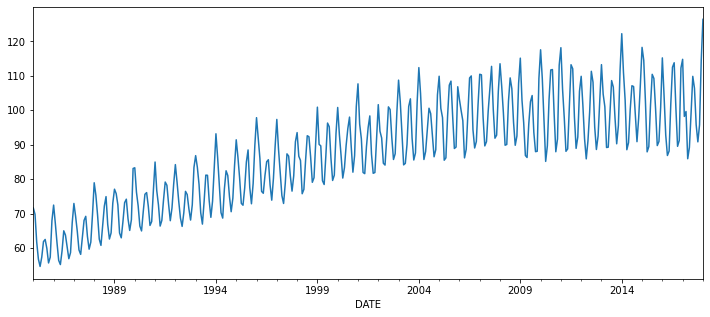

In [35]:
data['Energy Production'].plot(figsize=(12,5))

#Decompose the data into components

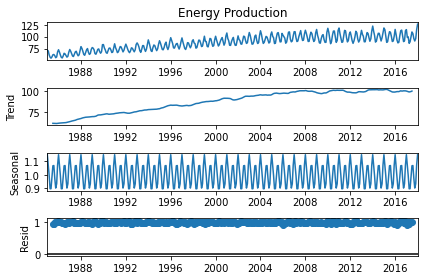

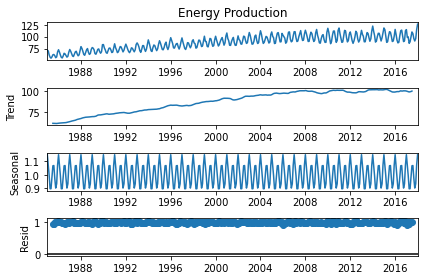

In [36]:
# ETS Decomposition
result = seasonal_decompose(data['Energy Production'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

#Stationarity Test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adfuller(data['Energy Production'])

(-2.3013045929606846,
 0.1715475595510173,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.3598201812765)

#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [39]:
!pip install pmdarima

In [40]:
from statsmodels.compat.pandas import Appender

In [41]:
import pmdarima as pm

In [42]:
from pmdarima import auto_arima

In [43]:
stepwise_fit = auto_arima(data['Energy Production'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2101.674, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2746.141, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2688.747, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2622.321, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.268, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2490.314, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.385, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2091.461, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2447.067, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2103.631, Time=0.90 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2057.213, Time=0.79 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2429.491, Time=0.44 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2069.284, Time=0.86 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

In [44]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1020.606
Date:                Sat, 29 Jan 2022   AIC                           2057.213
Time:                        21:29:25   BIC                           2089.064
Sample:                             0   HQIC                          2069.831
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1091      0.024      4.583      0.000       0.062       0.156
ar.L1          0.9985      0.002    515.056      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -792.081      0.000      -1.002      -0.997
ma.L1         -1.3680      0.038    -35.599      0.000      -1.443      -1.293
ma.L2          0.9323      0.072     13.003      0.000       0.792       1.073
ma.L3          0.0018      0.072      0.025      0.980      -0.139       0.142
ma.L4         -0.4326      0.041    -10.483      0.000      -0.514      -0.352
sigma2         9.9391      0.640     15.537      0.000       8.685      11.193
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                22.91
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#We’ll train from the years 1985–2016 and test our forecast on the years after that and compare it to the real data:

In [45]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [46]:
print(train.shape,test.shape)

(384, 1) (13, 1)


# Fit ARIMA model to the train dataset

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model = SARIMAX(train['Energy Production'], 
                order = (2, 1, 4))

In [49]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Energy Production   No. Observations:                  384
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -980.101
Date:                Sat, 29 Jan 2022   AIC                           1974.201
Time:                        21:29:26   BIC                           2001.837
Sample:                    01-01-1985   HQIC                          1985.164
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.002    423.214      0.000       0.993       1.003
ar.L2         -0.9984      0.002   -544.538      0.000      -1.002      -0.995
ma.L1         -1.3003      0.047    -27.491      0.000      -1.393      -1.208
ma.L2          0.9208      0.087     10.559      0.000       0.750       1.092
ma.L3          0.0198      0.090      0.221      0.825      -0.156       0.196
ma.L4         -0.3888      0.057     -6.861      0.000      -0.500      -0.278
sigma2         9.6631      0.657     14.715      0.000       8.376      10.950
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                23.14
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Predictions of ARIMA model against the test set

In [50]:
start = len(train)
end = len(train) + len(test) - 1

In [51]:
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  

<AxesSubplot:xlabel='DATE'>

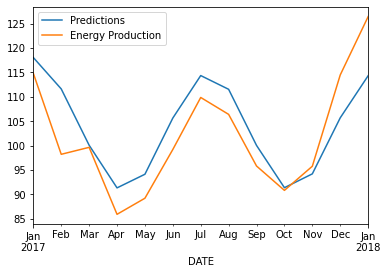

In [52]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Energy Production'].plot(legend = True)

#Evaluate the model using MSE and RMSE

In [53]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [54]:
rmse(test["Energy Production"], predictions)

6.655153266085422

In [55]:
mean_squared_error(test["Energy Production"], predictions)

44.29106499508745

#Forecast using ARIMA Model

In [56]:
model = model = SARIMAX(data['Energy Production'], 
                        order = (2, 1, 4))
result = model.fit()

#Forecast for the next 3 years

In [57]:
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

## Plot the forecast values

<AxesSubplot:xlabel='DATE'>

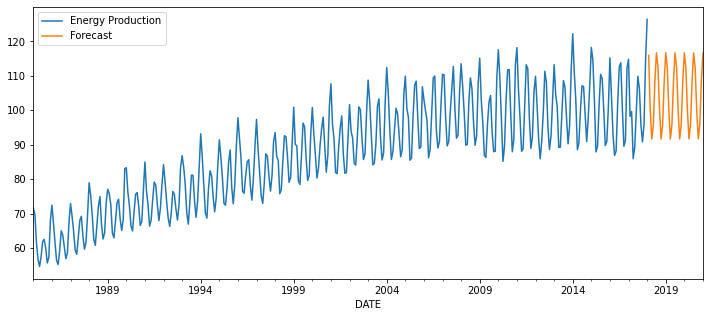

In [58]:
data['Energy Production'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)